<a href="https://colab.research.google.com/github/Omarouteix/PUC/blob/main/test1_raulbenitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN CURSO ANALISIS DE DATOS - PUC EEIGM October 2024 (20min)
Test 1 |
**Raúl Benítez**

1. Use the function load_dataset from the seaborn libarry to load the dataset 'diamonds'

https://seaborn.pydata.org/generated/seaborn.load_dataset.html

In [ ]:
import seaborn as sns
dt= sns.load_dataset('diamonds')
dt.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. Eliminad las variables 'carat', 'color', 'clarity'. Utilizaremos 'table', 'price', 'x', 'y' y 'z' como features y la variable 'cut' como etiqueta de clase.


In [ ]:
df = dt[['cut', 'x', 'y', 'z']].dropna()
features = df[['x', 'y', 'z']]
tag = df['cut']
df.head()

,cut,x,y,z
0,Ideal,3.95,3.98,2.43
1,Premium,3.89,3.84,2.31
2,Good,4.05,4.07,2.31
3,Premium,4.20,4.23,2.63
4,Good,4.34,4.35,2.75


3. Representad los datos mediante un scatter plot matrix utilizando colores diferentes para cada clase

<Figure size 800x800 with 0 Axes>

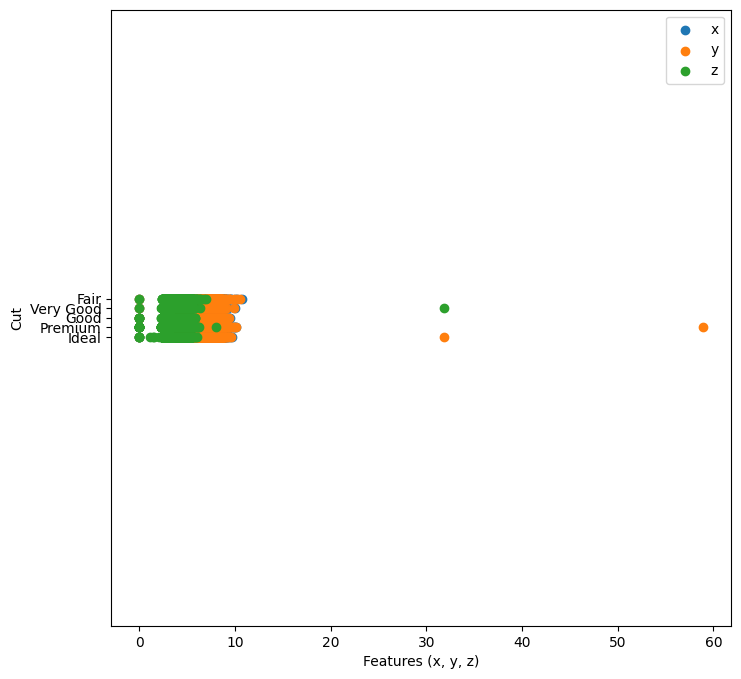

In [ ]:
import numpy as np
import matplotlib.pylab as plt
fig = plt.figure(figsize=(8,8))
fig = plt.figure(figsize=(8, 8))


for feature in ['x', 'y', 'z']:
    plt.scatter(features[feature], tag, label=feature)  # Label each scatter plot

plt.axis('equal')
plt.xlabel('Features (x, y, z)')  # Change the x-axis label to be more descriptive
plt.ylabel('Cut')  # Change the y-axis label to reflect tag name
plt.legend()  # Display the legend to differentiate the scatter plots
plt.show()

4. Dividid los datos en los subconjuntos de entrenamiento (70%) y test (30%)

In [ ]:
import seaborn as sns
import pandas as pd # Import pandas for DataFrame manipulation
import numpy as np
from sklearn.model_selection import train_test_split
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder


X = df[df.columns]  # Use filtered DataFrame for X
y = df['cut'].values

# Now X and y should have consistent shapes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

le = LabelEncoder()

# Fit the encoder to the 'cut' column and transform it in both train and test sets
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print('Número de observaciones del conjunto de entrenamiento es {}'.format(X_train.shape[0]))
print('Número de observaciones del conjunto de test es {}'.format(X_test.shape[0]))

convert X_train, X_test, y_train, y_test in ideal

SyntaxError: invalid syntax (<ipython-input-37-f31401ad4d69>, line 24)

5. Ajustad 5 modelos de clasificación: KNN, Gaussian Naive Bayes, Decision Trees, Quadratic Discriminant Analysis (QDA). Reportar las matrices de confusion y el classification report.

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

¿Qué modelo de clasificación presenta un mayor promeio del F1-score?


knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

xnew = X_test.iloc[0].values.reshape(1,-1)
true_label = y_test[0]
predicted_label = knn.predict(xnew)
print('Observación a predecir es {}'.format(*xnew))
print('la clase real a la que pertenece es {}'.format(true_label))
print('la clase que predice el algoritmo KNN que hemos entrenado es {}'.format(predicted_label))

from sklearn.metrics import confusion_matrix

y_knn_pred = knn.predict(X_test)
confusion_matrix(y_test, y_knn_pred)



ValueError: could not convert string to float: 'Ideal'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn_pred))

NameError: name 'y_knn_pred' is not defined

naive bayes

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Assuming X_train has a similar structure to X_test
# and 'cut' is the column with string values

# Convert 'cut' column to numerical representation using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['cut'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['cut'], drop_first=True)

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train_encoded, y_train).predict(X_test_encoded)

confusion_matrix(y_test, y_NB_pred)

array([[ 487,    0,    0,    0,    0],
       [   0, 1500,    0,    0,    0],
       [   0,    0, 6487,    0,    0],
       [   0,    0,    0, 4142,    0],
       [   0,    0,    0,    0, 3566]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_NB_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00      1500
           2       1.00      1.00      1.00      6487
           3       1.00      1.00      1.00      4142
           4       1.00      1.00      1.00      3566

    accuracy                           1.00     16182
   macro avg       1.00      1.00      1.00     16182
weighted avg       1.00      1.00      1.00     16182



decision tree

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plot_tree(dt)
plt.show()

ValueError: could not convert string to float: 'Ideal'

QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

clf = QuadraticDiscriminantAnalysis()

clf.fit(X_train, y_train)
QuadraticDiscriminantAnalysis()

y_pred = clf.predict(X_test)


confusion_matrix(y_test,y_pred)

TypeError: unsupported operand type(s) for /: 'str' and 'int'